<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/MonteCarlo_dcf_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
def calculate_dcf(initial_cf, growth_rates, discount_rate, terminal_growth, years):
  total_pv=0
  cashflow= initial_cf

  for year in range(1,years+1):
    cashflow*= (1+growth_rates[year-1]/100)
    pv= cashflow/(1+discount_rate/100)**year
    total_pv+= pv



    terminal_cf= cashflow*(1+terminal_growth/100)
    terminal_value = terminal_cf / (discount_rate/100 - terminal_growth/100)
    terminal_pv = terminal_value / (1 + discount_rate/100)**years
    return total_pv + terminal_pv


monte carlo simulation


In [14]:
import numpy as np

In [15]:
results= []
for i in range(10000):
  growth_rates=np.random.normal(10,3,5)
  discount_rates= np.random.uniform(8,15)
  value= calculate_dcf(100000,growth_rates,discount_rates, 3,5)
  results.append(value)

mean= np.mean(results)
condidence_value= np.percentile(results, [5,95])

display(f"Mean DCF Value: {mean}")
display(f"95% Confidence Interval: {condidence_value}")

'Mean DCF Value: 946067.2817010231'

'95% Confidence Interval: [ 586443.12140023 1523852.1335706 ]'

In [16]:
import seaborn as sns

<Axes: ylabel='Count'>

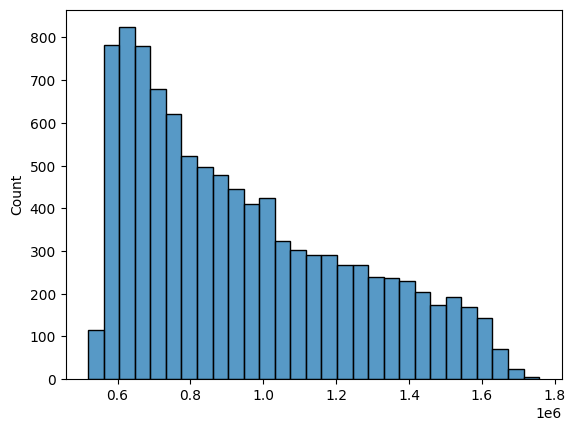

In [17]:
sns.histplot(results)

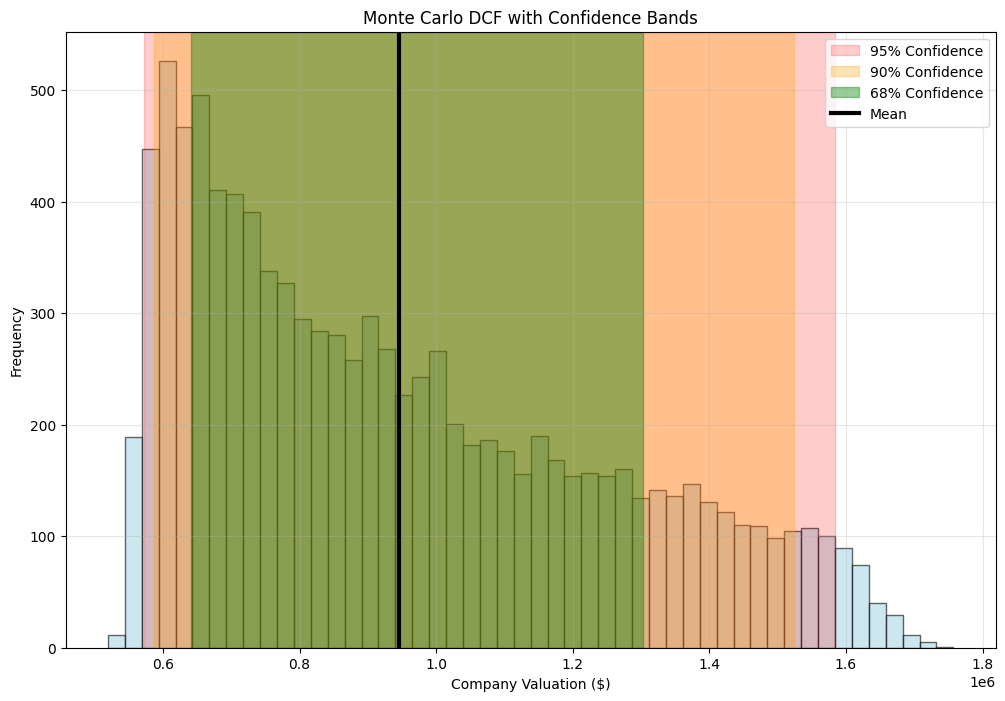

68% Confidence Interval: $640,635 - $1,303,156
90% Confidence Interval: $586,443 - $1,523,852
95% Confidence Interval: $572,784 - $1,583,859


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentiles
p68 = np.percentile(results, [16, 84])
p90 = np.percentile(results, [5, 95])
p95 = np.percentile(results, [2.5, 97.5])

plt.figure(figsize=(12, 8))

# Create histogram
counts, bins, patches = plt.hist(results, bins=50, alpha=0.6, color='lightblue', edgecolor='black')

# Add shaded confidence intervals
plt.axvspan(p95[0], p95[1], alpha=0.2, color='red', label='95% Confidence')
plt.axvspan(p90[0], p90[1], alpha=0.3, color='orange', label='90% Confidence')
plt.axvspan(p68[0], p68[1], alpha=0.4, color='green', label='68% Confidence')

# Add mean line
plt.axvline(np.mean(results), color='black', linestyle='-', linewidth=3, label='Mean')

plt.xlabel('Company Valuation ($)')
plt.ylabel('Frequency')
plt.title('Monte Carlo DCF with Confidence Bands')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print the actual values
print(f"68% Confidence Interval: ${p68[0]:,.0f} - ${p68[1]:,.0f}")
print(f"90% Confidence Interval: ${p90[0]:,.0f} - ${p90[1]:,.0f}")
print(f"95% Confidence Interval: ${p95[0]:,.0f} - ${p95[1]:,.0f}")